## Deterministics vs Stochastics Modelings

### 

In [1]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern numerical calculations,
# solving the ordinary differential equations, and plotting them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# integrate a system of ordinary differential equations
# initial value problem
from scipy.integrate import odeint

# module to make available data structures and routines
# for numerics
import numpy as np
import random

In [2]:
G1 = [0] # Gene first time interval
G2 = [0] # Gene second time interval
G3 = [0] # Gene third time interval
t = [0] # time point of new event

In [3]:
tend = 1000

In [4]:
k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

In [5]:
while t[-1] < tend: # -1 means last value of t array
    current_G1 = G1[-1]
    current_G2 = G2[-1]
    current_G3 = G3[-1]
    rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1,\
    (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2,\
    (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]
    rate_sum = sum(rates) # sum of the rates 
    tau = np.random.exponential(scale=1/rate_sum) # tau is the next point of time for event and the scale is the mean of distribution
    t.append(t[-1] + tau)
    rand = random.uniform(0,1) 
    if rand * rate_sum < rates[0]: # G1 production event 
            G1.append(G1[-1] + 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > rates[0] and rand * rate_sum < sum(rates[:2]): # G1 decay event 
            G1.append(G1[-1] - 1)
            G2.append(G2[-1])
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum < sum(rates[:3]):# G2 production event
            G1.append(G1[-1])
            G2.append(G2[-1] + 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum < sum(rates[:4]): # G2 decay event 
            G1.append(G1[-1])
            G2.append(G2[-1] - 1)
            G3.append(G3[-1])
    elif rand * rate_sum > sum(rates[:4]) and rand * rate_sum < sum(rates[:5]): # G3 production event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] + 1)
    elif rand * rate_sum > sum(rates[:5]) and rand * rate_sum < sum(rates[:6]): # G3 decay event
            G1.append(G1[-1])
            G2.append(G2[-1] )
            G3.append(G3[-1] - 1)

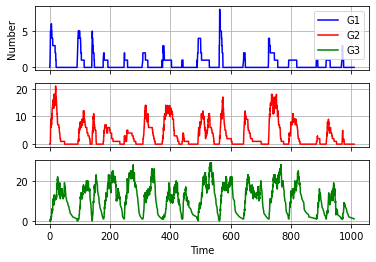

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , G1, color="b",label="G1")
line2, = ax2.plot(t , G2, color="r",label="G2")
line3, = ax3.plot(t , G3, color="g",label="G3")
ax1.set_ylabel("Number")
ax3.set_xlabel("Time")
ax1.legend(handles=[line1,line2,line3])
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()
#plt.savefig("Stochastic_Oscillator_1.pdf", dpi=400,  bbox_inches='tight')
